<center><h1><b><u>STATISTICAL-NLP PROJECT WEEK 3</u></b></h1></center>
<center><h3><b><u>PART-1</u></b></h3></center>
<h5><b><u>DOMAIN: </u></b></h5> 
<p>Digital content management</p>

<h5><b><u>CONTEXT: </u></b></h5> 
<p>
Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles,
etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to
create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.
</p>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
import os
from PIL import Image
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_selection import SelectKBest, chi2
import string
import pickle
import nltk
from random import randint
from tqdm.notebook import tqdm
import seaborn as sns
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
def create_confusion_matrics(true_value, pred_values, figsize = (10,7)):
  confusion_matrix_dl = confusion_matrix(true_value, pred_values)
  confusion_matrix_dl_df = pd.DataFrame(confusion_matrix_dl)
  plt.figure(figsize = figsize)
  return sns.heatmap(confusion_matrix_dl_df, annot=True, cmap='Blues', fmt='g')

In [3]:
blog_text_path = '/content/drive/MyDrive/GreatLearning/NLP_Projects/NLP-1/blogtext.csv'

In [4]:
blog_dataset = pd.read_csv(blog_text_path)
blog_dataset.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
fine_blog_dataset = blog_dataset[['text', 'topic']]
fine_blog_dataset.head()

,text,topic
0,"Info has been found (+/- 100 pages,...",Student
1,These are the team members: Drewe...,Student
2,In het kader van kernfusie op aarde...,Student
3,testing!!! testing!!!,Student
4,Thanks to Yahoo!'s Toolbar I can ...,InvestmentBanking


In [ ]:
stopwords_1 = set(STOPWORDS)

In [ ]:
sentences =  " ".join(te for te in fine_blog_dataset.text)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
mask = np.array(Image.open('/content/brain.jpeg'))

In [ ]:
transformed_brain_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    transformed_brain_mask[i] = list(map(transform_format, mask[i]))

In [ ]:
world_cloud = WordCloud(width=mask.shape[1], 
                        height=mask.shape[0], mask=mask,
                        max_words=5000, stopwords=stopwords_1,
                        background_color="white").generate(sentences)

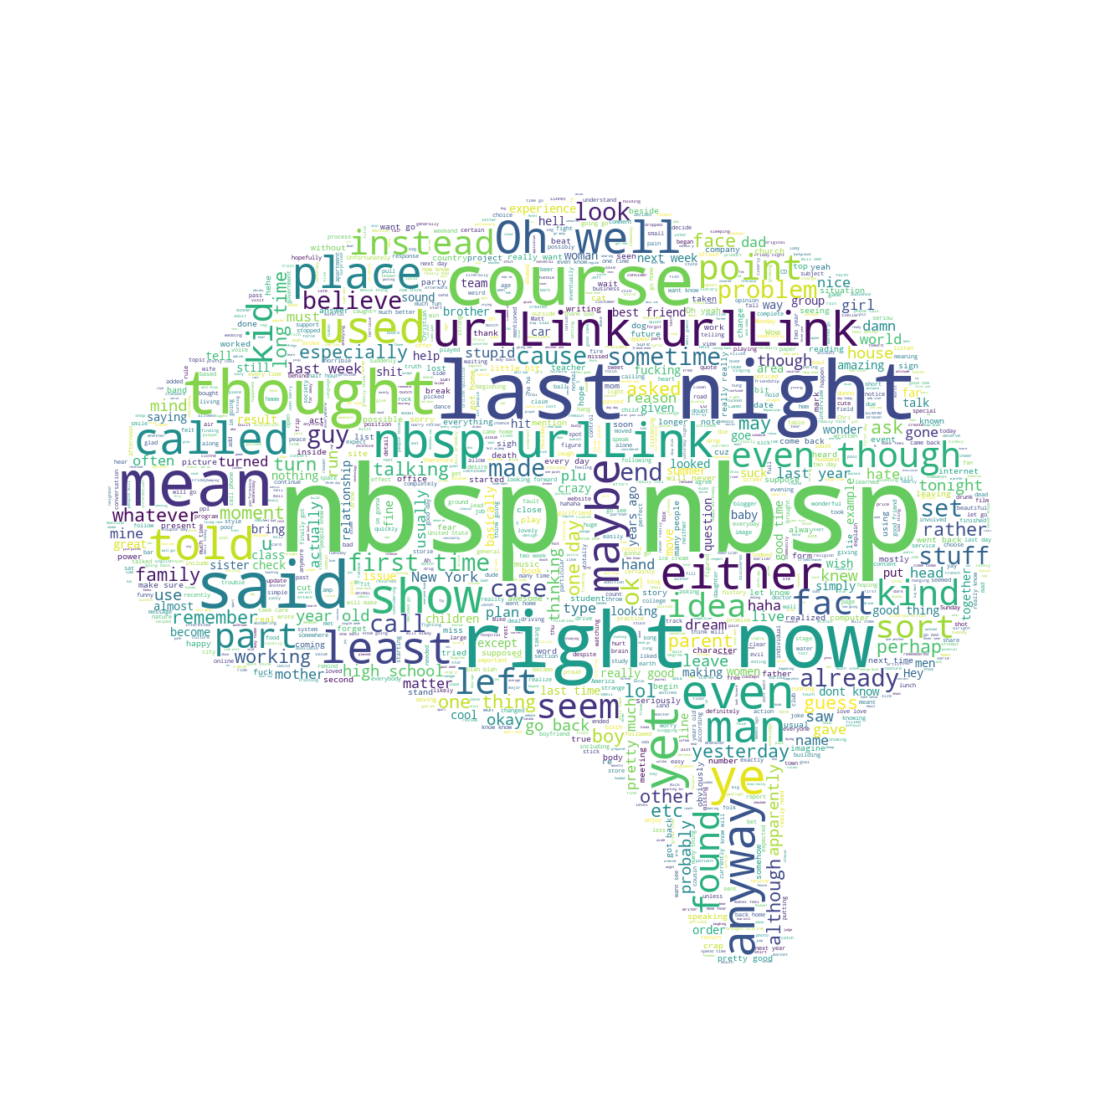

In [ ]:
fig=plt.figure(figsize=(20, 20))
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
wordNet = WordNetLemmatizer()

In [ ]:
features = []
for text_sentence in tqdm(fine_blog_dataset.text):
  word_tokens = word_tokenize(text_sentence) 
  filtered_sentence = [w.lower() for w in word_tokens if not w in stop_words] 
  filtered_sentence = [w1 for w1 in filtered_sentence if w1 not in string.punctuation]
  filtered_sentence = [wordNet.lemmatize(wo) for wo in filtered_sentence]
  filtered_sentence = " ".join(w2 for w2 in filtered_sentence)
  features.append(filtered_sentence)

In [ ]:
dataset = {
    'Features': features
}
data_pickle_file = open('Lemmatize_Data.pkl', 'ab')
pickle.dump(dataset, data_pickle_file)
data_pickle_file.close()

In [ ]:
! mv Lemmatize_Data.pkl /content/drive/MyDrive/GreatLearning/NLP_Projects/NLP-1/ModelDetailsSaved/Part-1/

In [13]:
pickle_path = '/content/drive/MyDrive/GreatLearning/NLP_Projects/NLP-1/ModelDetailsSaved/Part-1/Lemmatize_Data.pkl'
pkl_file = open(pickle_path, 'rb')
features_pickle = pickle.load(pkl_file)
pkl_file.close()
features =  features_pickle["Features"]

In [10]:
i = 6
fine_blog_dataset.text[i]

"             Somehow Coca-Cola has a way of summing up things so well.  In the early 1970s they had as their flagship jingle 'I'd Like to Buy the World a Coke' (to the tune of 'I'd Like to Teach the World to Sing') that pretty much summed up the post-Woodstock era so well.  It didn't add much to sales, but it was a catchy tune.  In Korea Coke's theme is  urlLink Stop Thinking. Feel it.  which pretty much sums up a lot about Korea and Koreans.  (Look at how relaxed that couple is, now that they stopped thinking and started feeling.) Of course they have a high regard for education and math and logic and such, but deep down I think many Koreans really like to work on emotion more than anything else.  Westerners seem to sublimate this moreso, or at least display it in a different way.  Maybe scratch all that...Westerners and Koreans are probably pretty similar, but the context in which we do it is different.  Anyways, if you think you're losing it in Korea just repeat to yourself 'Stop th

In [14]:
features[i]

"somehow coca-cola way summing thing well in early 1970s flagship jingle 'i 'd like buy world coke tune 'i 'd like teach world sing pretty much summed post-woodstock era well it n't add much sale catchy tune in korea coke 's theme urllink stop thinking feel pretty much sum lot korea korean look relaxed couple stopped thinking started feeling of course high regard education math logic deep i think many korean really like work emotion anything else westerner seem sublimate moreso least display different way maybe scratch ... westerner korean probably pretty similar context different anyways think 're losing korea repeat 'stop thinking feel stop thinking feel stop thinking feel everything alright"

In [6]:
targets = fine_blog_dataset.topic

In [ ]:
targets.unique()

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Architecture', 'Advertising', 'Agriculture', 'Biotech',
       'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
       'Maritime', 'Tourism', 'Environment'], dtype=object)

In [7]:
target_encoder = LabelEncoder()

In [8]:
encoded_targets = target_encoder.fit_transform(targets)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


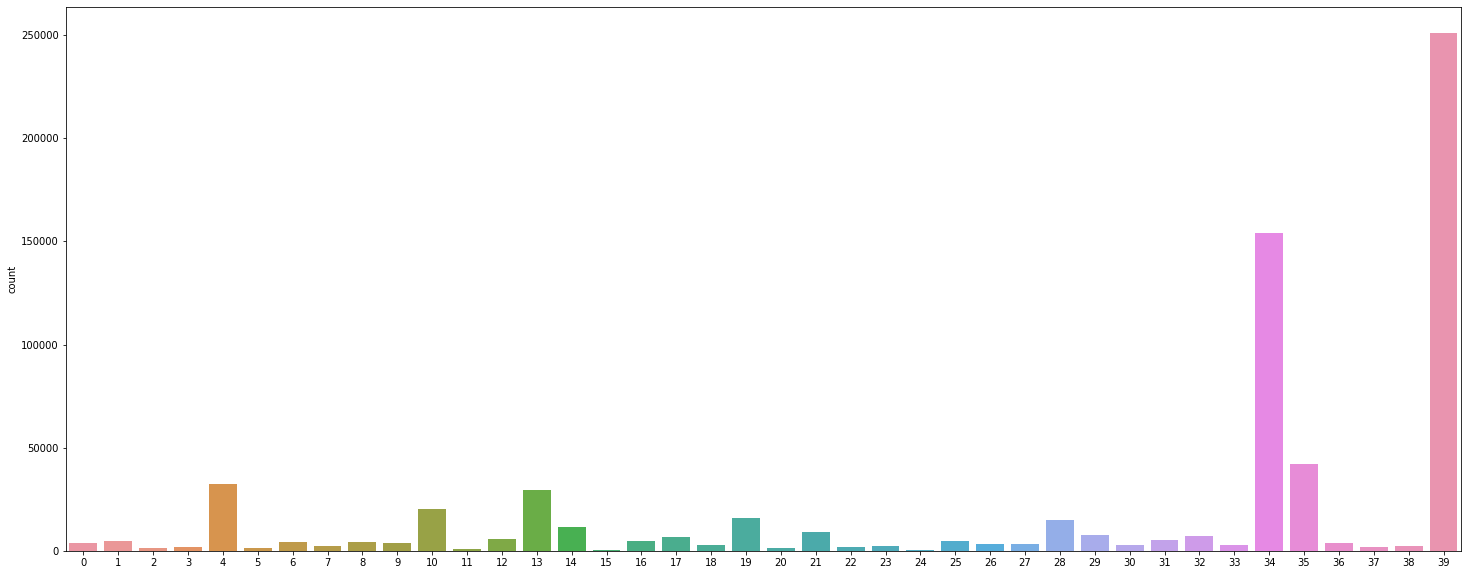

In [ ]:
plt.figure(figsize=(25, 10))
sns.countplot(encoded_targets)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, encoded_targets, test_size=0.3, random_state=42)
len(X_train),len(X_test), len(y_train),len(y_test)

(476898, 204386, 476898, 204386)

In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [17]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

**Feature Selection**

In [18]:
ch2 = SelectKBest(chi2, k=5000)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)

In [ ]:
list(X_train[0])

<1x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1144
           1       1.00      0.00      0.01      1387
           2       0.00      0.00      0.00       364
           3       0.00      0.00      0.00       524
           4       0.52      0.01      0.01      9752
           5       0.00      0.00      0.00       397
           6       1.00      0.00      0.00      1211
           7       1.00      0.00      0.00       670
           8       0.96      0.02      0.04      1380
           9       0.00      0.00      0.00      1241
          10       1.00      0.00      0.01      5972
          11       0.00      0.00      0.00       300
          12       0.50      0.00      0.00      1764
          13       0.93      0.00      0.01      8990
          14       0.98      0.01      0.03      3525
          15       0.00      0.00      0.00       161
          16       1.00      0.01      0.02      1448
          17       1.00    

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
randomForest_pred = randomForest.predict(X_test)

In [23]:
print(classification_report(y_test, randomForest_pred))

              precision    recall  f1-score   support

           0       0.15      0.05      0.08      1144
           1       0.11      0.03      0.05      1387
           2       0.06      0.01      0.02       364
           3       0.09      0.04      0.05       524
           4       0.23      0.08      0.12      9752
           5       0.11      0.03      0.05       397
           6       0.09      0.03      0.05      1211
           7       0.15      0.05      0.07       670
           8       0.40      0.11      0.17      1380
           9       0.06      0.02      0.03      1241
          10       0.17      0.05      0.08      5972
          11       0.26      0.08      0.13       300
          12       0.10      0.02      0.04      1764
          13       0.26      0.08      0.12      8990
          14       0.23      0.07      0.11      3525
          15       0.04      0.02      0.03       161
          16       0.55      0.23      0.32      1448
          17       0.26    

**Conclusion:** <p>
It is clearly seen that RandomForestClassifier perform better 
</p>

<center><h3><b><u>PART-2</u></b></h3></center>
<h5><b><u>DOMAIN: </u></b></h5> 
<p>Customer support</p>

<h5><b><u>CONTEXT: </u></b></h5> 
<p>
Great Learning has a an academic support department which receives numerous support requests every day throughout the
year. Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to
heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a
proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can
interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request
to an actual human support executive if the request is complex or not in it’s database
</p>

In [1]:
import json
import re

In [2]:
corpus_path = '/content/drive/MyDrive/GreatLearning/NLP_Projects/NLP-1/SampleCorpus-GL-Bot.json'

In [72]:
f = open(corpus_path, "r")
corpus = json.loads(f.read())
intents = corpus["intents"]
print(corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [ ]:
special_characters = [';', ':', '!', '*', '#',
                      '(', ')','{', '}','\'',
                      '\\','//' ,'\"','[',']',
                      '~', '`', ',', '^', '?',
                      '>', '<', '.', '-', '+', '=',
                      '_']

In [102]:
def get_context_response(cust_input):
  input_text = cleanString = re.sub('\W+',' ', cust_input)
  for item in intents:
    for pattern in item["patterns"]:
      matched = re.search(pattern.lower(), input_text)
      if matched:
        return (item['tag'], item['responses'][0])
  return (None, None)
      

In [103]:
should_exit = False
print("Type Exit to Quit\n\n")
while not should_exit:
    cust_input = input("You: ")
    if cust_input.lower() != 'exit':
       tag, response = get_context_response(cust_input.lower())
       if response != None:
        print("Jarvish: {}".format(response))
       else:
        print("I did not understand your question")
    else:
      should_exit = True

Type Exit to Quit


You: Hi
Jarvish: Hello! how can i help you ?
You: How does forward propagation works work
Jarvish: You will be finding more here: https://en.wikipedia.org/wiki/Artificial_neural_network
You: what is ann
Jarvish: You will be finding more here: https://en.wikipedia.org/wiki/Artificial_neural_network
You: what is svm
I did not understand your question
You: what is  gradient boosting
Jarvish: You will be finding more here: https://en.wikipedia.org/wiki/Supervised_learning#:~:text=Supervised%20learning%20is%20the%20machine,a%20set%20of%20training%20examples.
You: how deep learning works
I did not understand your question
You: what is deep learning
Jarvish: You will be finding more here: https://en.wikipedia.org/wiki/Artificial_neural_network
You: how activation function works
Jarvish: You will be finding more here: https://en.wikipedia.org/wiki/Artificial_neural_network
You: are you bot
Jarvish: Hello! how can i help you ?
You: not good solution
Jarvish: Tarnsferring the

In [104]:
!jupyter nbconvert --to html /content/drive/MyDrive/'Colab Notebooks'/NLP_Project3.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NLP_Project3.ipynb to html
[NbConvertApp] Writing 1264137 bytes to /content/drive/MyDrive/Colab Notebooks/NLP_Project3.html
